In [94]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

np.__version__,pd.__version__,sklearn.__version__,matplotlib.__version__

('1.19.1', '1.2.4', '0.24.2', '3.2.2')

In [95]:
# Dataset capturado do desafio https://www.kaggle.com/shivam2503/diamonds
df = pd.read_csv('../data/diamonds.csv',index_col=0)

# Binarização simples dos dados categóricos
df = df.join(pd.get_dummies(df.select_dtypes('object'))).drop(df.select_dtypes('object').columns,axis=1)

In [98]:
display(df)

carat  depth  table  price     x     y     z  cut_Fair  cut_Good  \
1       0.23   61.5   55.0    326  3.95  3.98  2.43         0         0   
2       0.21   59.8   61.0    326  3.89  3.84  2.31         0         0   
3       0.23   56.9   65.0    327  4.05  4.07  2.31         0         1   
4       0.29   62.4   58.0    334  4.20  4.23  2.63         0         0   
5       0.31   63.3   58.0    335  4.34  4.35  2.75         0         1   
...      ...    ...    ...    ...   ...   ...   ...       ...       ...   
53936   0.72   60.8   57.0   2757  5.75  5.76  3.50         0         0   
53937   0.72   63.1   55.0   2757  5.69  5.75  3.61         0         1   
53938   0.70   62.8   60.0   2757  5.66  5.68  3.56         0         0   
53939   0.86   61.0   58.0   2757  6.15  6.12  3.74         0         0   
53940   0.75   62.2   55.0   2757  5.83  5.87  3.64         0         0   

       cut_Ideal  ...  color_I  color_J  clarity_I1  clarity_IF  clarity_SI1  \
1              1  ...        0        0           0           0            0   
2              0  ...        0        0           0           0            1   
3              0  ...        0        0           0           0            0   
4              0  ...        1        0           0           0            0   
5              0  ...        0        1           0           0            0   
...          ...  ...      ...      ...         ...         ...          ...   
53936          1  ...        0        0           0           0            1   
53937          0  ...        0        0           0           0            1   
53938          0  ...        0        0           0           0            1   
53939          0  ...        0        0           0           0            0   
53940          1  ...        0        0           0           0            0   

       clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2  
1                1            0            0             0             0  
2                0            0            0             0             0  
3                0            1            0             0             0  
4                0            0            1             0             0  
5                1            0            0             0             0  
...            ...          ...          ...           ...           ...  
53936            0            0            0             0             0  
53937            0            0            0             0             0  
53938            0            0            0             0             0  
53939            1            0            0             0             0  
53940            1            0            0             0             0  

[53940 rows x 27 columns]

In [99]:
display(df.describe().T)

count         mean          std    min     25%      50%  \
carat          53940.0     0.797940     0.474011    0.2    0.40     0.70   
depth          53940.0    61.749405     1.432621   43.0   61.00    61.80   
table          53940.0    57.457184     2.234491   43.0   56.00    57.00   
price          53940.0  3932.799722  3989.439738  326.0  950.00  2401.00   
x              53940.0     5.731157     1.121761    0.0    4.71     5.70   
y              53940.0     5.734526     1.142135    0.0    4.72     5.71   
z              53940.0     3.538734     0.705699    0.0    2.91     3.53   
cut_Fair       53940.0     0.029848     0.170169    0.0    0.00     0.00   
cut_Good       53940.0     0.090953     0.287545    0.0    0.00     0.00   
cut_Ideal      53940.0     0.399537     0.489808    0.0    0.00     0.00   
cut_Premium    53940.0     0.255673     0.436243    0.0    0.00     0.00   
cut_Very Good  53940.0     0.223990     0.416919    0.0    0.00     0.00   
color_D        53940.0     0.125603     0.331404    0.0    0.00     0.00   
color_E        53940.0     0.181628     0.385541    0.0    0.00     0.00   
color_F        53940.0     0.176900     0.381588    0.0    0.00     0.00   
color_G        53940.0     0.209344     0.406844    0.0    0.00     0.00   
color_H        53940.0     0.153949     0.360903    0.0    0.00     0.00   
color_I        53940.0     0.100519     0.300694    0.0    0.00     0.00   
color_J        53940.0     0.052058     0.222146    0.0    0.00     0.00   
clarity_I1     53940.0     0.013737     0.116400    0.0    0.00     0.00   
clarity_IF     53940.0     0.033185     0.179121    0.0    0.00     0.00   
clarity_SI1    53940.0     0.242214     0.428427    0.0    0.00     0.00   
clarity_SI2    53940.0     0.170449     0.376030    0.0    0.00     0.00   
clarity_VS1    53940.0     0.151483     0.358522    0.0    0.00     0.00   
clarity_VS2    53940.0     0.227253     0.419061    0.0    0.00     0.00   
clarity_VVS1   53940.0     0.067760     0.251337    0.0    0.00     0.00   
clarity_VVS2   53940.0     0.093919     0.291719    0.0    0.00     0.00   

                   75%       max  
carat             1.04      5.01  
depth            62.50     79.00  
table            59.00     95.00  
price          5324.25  18823.00  
x                 6.54     10.74  
y                 6.54     58.90  
z                 4.04     31.80  
cut_Fair          0.00      1.00  
cut_Good          0.00      1.00  
cut_Ideal         1.00      1.00  
cut_Premium       1.00      1.00  
cut_Very Good     0.00      1.00  
color_D           0.00      1.00  
color_E           0.00      1.00  
color_F           0.00      1.00  
color_G           0.00      1.00  
color_H           0.00      1.00  
color_I           0.00      1.00  
color_J           0.00      1.00  
clarity_I1        0.00      1.00  
clarity_IF        0.00      1.00  
clarity_SI1       0.00      1.00  
clarity_SI2       0.00      1.00  
clarity_VS1       0.00      1.00  
clarity_VS2       0.00      1.00  
clarity_VVS1      0.00      1.00  
clarity_VVS2      0.00      1.00

In [85]:
model = LinearRegression()
X = df.drop('price',axis=1)
y = df.price.to_numpy().reshape(-1)

In [86]:
model.fit(X,y)

LinearRegression()

In [87]:
y_pred = model.predict(X)
mean_squared_error(y,y_pred)

1276545.174308389

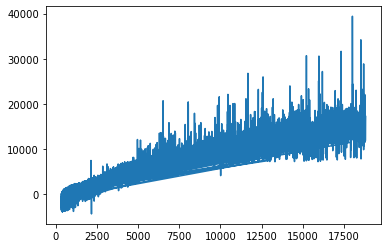

In [88]:
plt.plot(y,y_pred)

In [89]:
model.intercept_ , model.coef_

(5753.761857063733,
 array([ 1.12569783e+04, -6.38061004e+01, -2.64740847e+01, -1.00826110e+03,
         9.60888648e+00, -5.01188909e+01, -5.80317966e+02, -5.66520912e-01,
         2.52593878e+02,  1.81825984e+02,  1.46464625e+02,  8.25702862e+02,
         6.16584777e+02,  5.52849030e+02,  3.43663958e+02, -1.54563813e+02,
        -6.40541612e+02, -1.54369520e+03, -3.81466940e+03,  1.53043284e+03,
        -1.49197322e+02, -1.11208311e+03,  7.63728513e+02,  4.52554163e+02,
         1.19308964e+03,  1.13614467e+03]))

In [92]:
intcpt = model.intercept_
delta = 0.1 * intcpt
intcpt_array = np.linspace(intcpt-delta,intcpt+delta,100)
mse_array = []
for i in intcpt_array:
    model.intercept_ = i
    y_aux = model.predict(X)
    mse_array.append(mean_squared_error(y,y_aux))
    
mse_array = np.array(mse_array)
model.intercept_ = intcpt

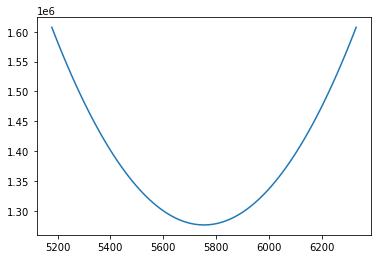

In [93]:
plt.plot(intcpt_array,mse_array)